In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y')

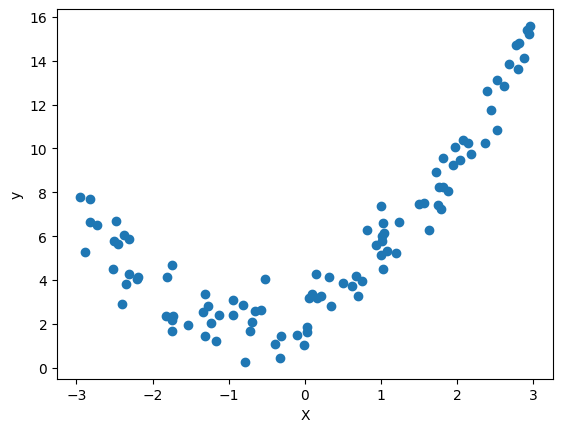

In [8]:
X=6*np.random.rand(100,1)-3
y=0.5+X**2+1.5*X+2+np.random.randn(100,1)
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [10]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [14]:
from sklearn.metrics import r2_score

r2_score=r2_score(y_test,regression.predict(X_test))
print(r2_score)

0.5442381291404262


Text(0, 0.5, 'Y Label')

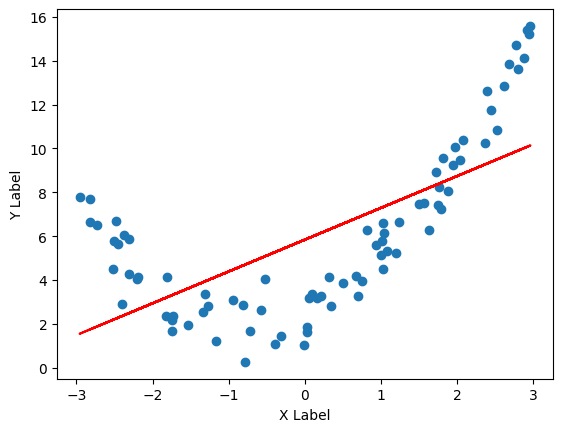

In [15]:
##Lets visualize model
plt.plot(X_train,regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel('X Label')
plt.ylabel('Y Label')

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)

In [21]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)


In [22]:
X_train_poly

array([[ 1.00000000e+00, -2.82256474e+00,  7.96687170e+00],
       [ 1.00000000e+00, -8.14915373e-01,  6.64087064e-01],
       [ 1.00000000e+00, -1.74405193e+00,  3.04171715e+00],
       [ 1.00000000e+00, -2.95898285e+00,  8.75557949e+00],
       [ 1.00000000e+00,  1.88043760e+00,  3.53604557e+00],
       [ 1.00000000e+00, -7.88234615e-01,  6.21313808e-01],
       [ 1.00000000e+00,  1.03080439e+00,  1.06255769e+00],
       [ 1.00000000e+00,  9.59793131e-02,  9.21202855e-03],
       [ 1.00000000e+00,  4.96400527e-01,  2.46413483e-01],
       [ 1.00000000e+00, -2.30760743e+00,  5.32505207e+00],
       [ 1.00000000e+00,  1.94226070e+00,  3.77237664e+00],
       [ 1.00000000e+00,  2.77365393e+00,  7.69315611e+00],
       [ 1.00000000e+00,  2.67555262e+00,  7.15858180e+00],
       [ 1.00000000e+00,  3.16969969e-01,  1.00469961e-01],
       [ 1.00000000e+00, -1.53504452e+00,  2.35636167e+00],
       [ 1.00000000e+00,  3.44698638e-01,  1.18817151e-01],
       [ 1.00000000e+00,  2.21086744e-02

In [23]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,regression.predict(X_test_poly))
print(r2_score)

0.9320409584859115


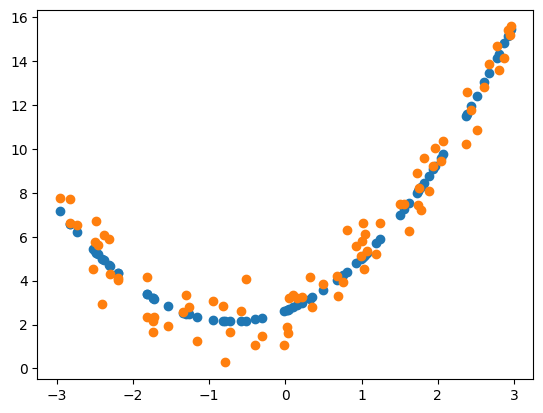

In [28]:
plt.scatter(x=X_train,y=regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [29]:
##Prediction of new data
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.fit_transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

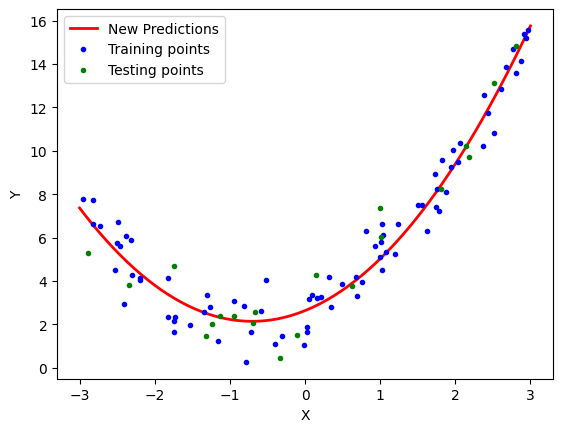

In [37]:
y_new=regression.predict(X_new_poly)
plt.plot(X_new,y_new,'r-',linewidth=2,label='New Predictions')
plt.plot(X_train,y_train,'b.',label='Training points')
plt.plot(X_test,y_test,'g.',label='Testing points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Pipeline

In [39]:
from sklearn.pipeline import Pipeline

In [45]:
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)

    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new=poly_regression.predict(X_new)
    ##plotting prediction line
    plt.plot(X_new,y_pred_new,'r',label='Degree '+str(degree))
    plt.plot(X_train,y_train,'b.',linewidth=3)
    plt.plot(X_test,y_test,'g.',linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4,4,0,10])
    plt.show()


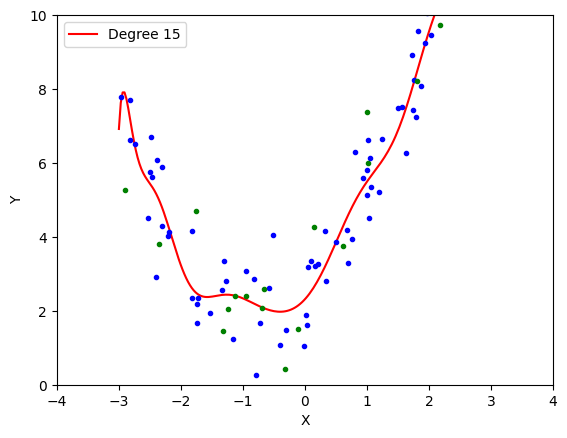

In [51]:
poly_regression(15)